In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm


In [2]:
data = pd.read_csv(r'initial_dummied_data_TRAIN.csv')

In [3]:
data

,SalePrice,GrLivArea,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,MSSubClass_>1-story,MSSubClass_multi_fam,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,UnpavedDrive,WoodDeckBinary,HasPorch,FenceBinary,Fireplaces,NoCentralAir,SchD_S
0,143000,1632,1632,0,8,4,2,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,153500,1226,1226,0,7,2,1,1,0,0,...,0,0,0,0,1,1,0,1,0,0
2,199900,1241,1241,0,4,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,113000,793,793,0,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,131900,796,796,0,4,2,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,270000,1959,1088,871,8,3,2,1,1,0,...,0,1,0,0,1,1,0,1,0,0
1724,173000,1675,1675,0,8,3,2,0,0,0,...,0,0,0,0,0,1,0,2,0,0
1725,67500,1012,1012,0,5,2,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1726,132000,970,970,0,6,3,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0


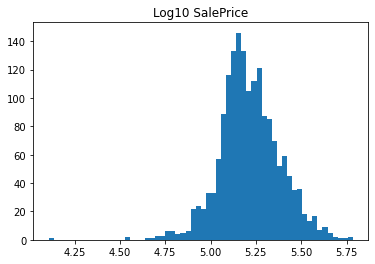

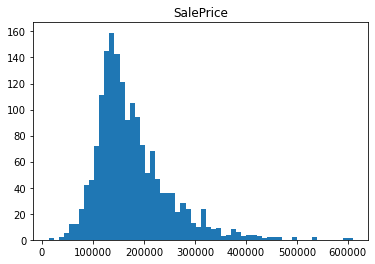

In [4]:
bins=60
plt.hist(np.log10(data['SalePrice']), bins=bins)
plt.title('Log10 SalePrice')
plt.show()
plt.hist(data['SalePrice'], bins=bins)
plt.title('SalePrice')
plt.show()

Maybe our models should regress against log-transformed price??

In [5]:
ppsq = data['SalePrice']/data['GrLivArea']
ppsq

0        87.622549
1       125.203915
2       161.079774
3       142.496847
4       165.703518
           ...    
1723    137.825421
1724    103.283582
1725     66.699605
1726    136.082474
1727     86.864407
Length: 1728, dtype: float64

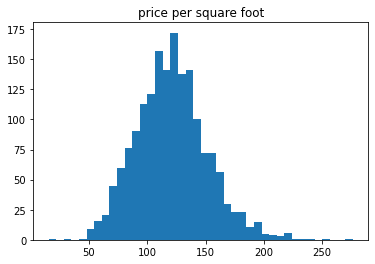

In [6]:
plt.hist(ppsq, bins=40)
plt.title('price per square foot')
plt.show()

Price per square foot looks much more like normally distributed data than price alone does, or even log-price. Still not really great though.

### Start of Multicollinearity Testing

First, I will get a list of all categorical variables. Then I will loop through the list to find the R^2 for each variable vs all others, the test if there is multicollinearity present.

In [7]:
print('Column names: ', data.columns)
data.T.iloc[:52,0:4]


Column names:  Index(['SalePrice', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'BedroomAbvGr', 'FullBath', 'HalfBath', 'MSSubClass_>1-story',
       'MSSubClass_multi_fam',
       ...
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'UnpavedDrive', 'WoodDeckBinary', 'HasPorch', 'FenceBinary',
       'Fireplaces', 'NoCentralAir', 'SchD_S'],
      dtype='object', length=103)


,0,1,2,3
SalePrice,143000.0,153500.0,199900.0,113000.0
GrLivArea,1632.0,1226.0,1241.0,793.0
1stFlrSF,1632.0,1226.0,1241.0,793.0
2ndFlrSF,0.0,0.0,0.0,0.0
TotRmsAbvGrd,8.0,7.0,4.0,4.0
BedroomAbvGr,4.0,2.0,1.0,2.0
FullBath,2.0,1.0,1.0,1.0
HalfBath,0.0,1.0,1.0,0.0
MSSubClass_>1-story,0.0,0.0,0.0,0.0
MSSubClass_multi_fam,1.0,0.0,0.0,0.0


In [117]:
data.T.iloc[52:,0:4]

,0,1,2,3
RemodelYrsAftBuilt,0.0,0.0,1.0,5.0
Functional_Min,0.0,1.0,0.0,0.0
Functional_Maj,0.0,0.0,0.0,0.0
FireplaceQu_Ex,0.0,0.0,0.0,0.0
FireplaceQu_Gd,0.0,1.0,0.0,0.0
FireplaceQu_TA,0.0,0.0,0.0,0.0
FireplaceQu_Fa,0.0,0.0,0.0,0.0
FireplaceQu_Po,0.0,0.0,0.0,0.0
BsmtQual_None,0.0,1.0,0.0,0.0
BsmtCond_None,0.0,1.0,0.0,0.0


In [8]:
y_col = data['SalePrice']
x_cols = data.drop('SalePrice', axis=1)

In [9]:
numeric_cols = []
for col in x_cols.columns:
    if len(data[col].value_counts()) > 14:
        numeric_cols.append(col)
numeric_cols

['GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'LotArea',
 'LndAc_S',
 'MasVnrArea',
 'YearBuilt',
 'RemodelYrsAftBuilt',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'GarageArea']

In [10]:
RSquared = []
variable_name = []
for var in numeric_cols:
    indep_var = x_cols[var]
    predictors = x_cols.drop(var, axis=1)
    ols = linear_model.LinearRegression()
    ols.fit(predictors, indep_var)
    variable_name.append(var)
    RSquared.append(ols.score(predictors, indep_var))

val_dfs = pd.concat([pd.Series(RSquared), pd.Series(variable_name)], axis=1)
val_dfs = val_dfs.sort_values(by=0, ascending=False)
val_dfs

,0,1
0,0.992906,GrLivArea
2,0.990619,2ndFlrSF
1,0.989185,1stFlrSF
6,0.933375,YearBuilt
4,0.925943,LndAc_S
8,0.865488,TotalBsmtSF
10,0.835324,GarageArea
7,0.756348,RemodelYrsAftBuilt
9,0.642265,BsmtUnfSF
5,0.609467,MasVnrArea


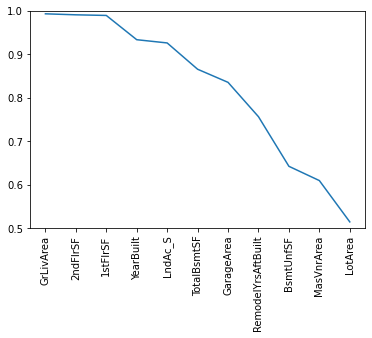

In [11]:
plt.plot(val_dfs[1], val_dfs[0])
plt.xticks(rotation=90)
plt.ylim(0.5,1)
plt.show()

## Regression w/o 1stFlrSF

GrLivArea, 2ndFlrSF, and 1stFlrSF show almost perfect multicollinearity with the other columns, I bet if we drop 1stFloorSF this will look a lot better. Keep 2ndFlrSF since it gives us info on floors as well. Redoing this w/o 1stFlrSF in the dataset.

In [12]:
x_cols_reduced = x_cols.drop('1stFlrSF', axis=1)

In [13]:
numeric_cols_reduced = []
for col in x_cols_reduced.columns:
    if len(data[col].value_counts()) > 14:
        numeric_cols_reduced.append(col)
numeric_cols_reduced

['GrLivArea',
 '2ndFlrSF',
 'LotArea',
 'LndAc_S',
 'MasVnrArea',
 'YearBuilt',
 'RemodelYrsAftBuilt',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'GarageArea']

In [14]:
RSquared = []
variable_name = []
for var in numeric_cols_reduced:
    indep_var = x_cols_reduced[var]
    predictors = x_cols_reduced.drop(var, axis=1)
    ols = linear_model.LinearRegression()
    ols.fit(predictors, indep_var)
    variable_name.append(var)
    RSquared.append(ols.score(predictors, indep_var))

val_dfs_reduced = pd.concat([pd.Series(RSquared), pd.Series(variable_name)], axis=1)
val_dfs_reduced = val_dfs_reduced.sort_values(by=0, ascending=False)
val_dfs_reduced

,0,1
5,0.933254,YearBuilt
3,0.925445,LndAc_S
0,0.923119,GrLivArea
1,0.904671,2ndFlrSF
7,0.863291,TotalBsmtSF
9,0.835287,GarageArea
6,0.755580,RemodelYrsAftBuilt
8,0.642264,BsmtUnfSF
4,0.609213,MasVnrArea
2,0.514416,LotArea


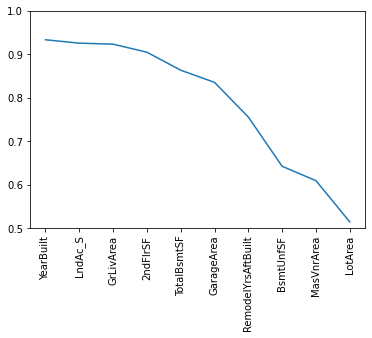

In [15]:
plt.plot(val_dfs_reduced[1], val_dfs_reduced[0])
plt.xticks(rotation=90)
plt.ylim(0.5,1)
plt.show()

In [16]:
categorical_vars = []
for col in x_cols_reduced:
    if col in numeric_cols_reduced:
        continue
    categorical_vars.append(col)
categorical_vars

['TotRmsAbvGrd',
 'BedroomAbvGr',
 'FullBath',
 'HalfBath',
 'MSSubClass_>1-story',
 'MSSubClass_multi_fam',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BldgType_2Fam',
 'LotShape_IR',
 'SlopedLot',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Pos',
 'Condition1_RailRd',
 'NonStdElectrical',
 'MasVnrType_BrkFace',
 'MasVnrType_StoneBrkcom',
 'RoofStyle_Hip',
 'RoofStyle_Other',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkFace',
 'Exterior1st_HdbdOther',
 'Exterior1st_MetalSd',
 'Exterior1st_Stc_CemBd_WdSdSh',
 'Foundation_BrkTil',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'OverallQual',
 'OverallCondBinary',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'HeatingQC_Fa',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_Fa',
 'Remodeled',
 'Functional_Min',
 'Functional_Maj',
 'FireplaceQu_Ex',
 'FireplaceQu_Gd',
 'FireplaceQu_TA',
 'FireplaceQu_Fa',
 'Firepl

Plan: Investigate the overlap observation counts for all the different quality categorical variables

In [17]:
data.groupby(['BedroomAbvGr', 'TotRmsAbvGrd']).agg(['count', 'mean'])[['SalePrice', 'GrLivArea']]

SalePrice                GrLivArea             
                              count           mean     count         mean
BedroomAbvGr TotRmsAbvGrd                                                
0            3                    2  142500.000000         2   948.000000
             4                    2  202000.000000         2  1290.000000
             5                    2  335500.000000         2  1717.500000
1            3                   11  100390.909091        11   683.090909
             4                   31  158283.064516        31  1041.129032
             5                   10  228403.000000        10  1320.300000
             6                    8  215150.625000         8  1427.000000
             7                    2  311464.500000         2  1869.000000
             8                    1  394432.000000         1  1856.000000
2            3                    2  145000.000000         2  1248.000000
             4                  100  115137.200000       100   906.310000
             5                  195  145441.030769       195  1113.882051
             6                  108  185711.314815       108  1380.694444
             7                   37  249135.972973        37  1724.810811
             8                    8  233145.500000         8  1660.750000
             9                    1  202500.000000         1  1827.000000
3            4                    5  135000.000000         5  1316.800000
             5                  150  128319.113333       150  1050.786667
             6                  352  157726.605114       352  1317.397727
             7                  300  195884.490000       300  1641.773333
             8                   96  229141.375000        96  1861.802083
             9                   23  240911.956522        23  2085.130435
             10                   5  401932.400000         5  2301.400000
             11                   1  191000.000000         1  2555.000000
             12                   1  200500.000000         1  3086.000000
4            6                    8  157125.000000         8  1670.625000
             7                   56  168333.428571        56  1706.232143
             8                   90  191578.800000        90  1931.188889
             9                   50  260124.000000        50  2370.720000
             10                  19  293735.947368        19  2433.000000
             11                   7  301383.285714         7  2747.285714
             12                   4  277750.000000         4  2492.000000
5            7                    3  256300.000000         3  2526.666667
             8                    6  174083.333333         6  2016.833333
             9                    5  172200.000000         5  2071.400000
             10                   8  191037.500000         8  2349.000000
             11                   4  242425.000000         4  3047.000000
             12                   2  175650.000000         2  2678.000000
             13                   1  205000.000000         1  2480.000000
6            8                    2  269500.000000         2  2787.000000
             9                    1  135900.000000         1  1716.000000
             10                   8  132100.000000         8  1882.625000
             12                   1  150000.000000         1  2592.000000

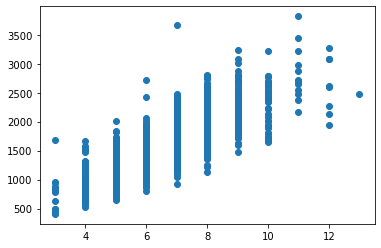

In [18]:
plt.scatter(data['TotRmsAbvGrd'], data['GrLivArea'])

In [19]:
ols=linear_model.LinearRegression()
ols.fit(data[['TotRmsAbvGrd']], data['GrLivArea'])
print('R^2 for SLR of TotRmsAbvGrd predicting GrLivArea', round(ols.score(data[['TotRmsAbvGrd']], data['GrLivArea']),2))

R^2 for SLR of TotRmsAbvGrd predicting GrLivArea 0.65


## The above three peices of info indicate that totRmsAbvGrd don't add much that GrLivArea doesn't already capture, and that it results in significant multicollinearity between the two. Drop TotRmsAbvGrd.

In [20]:
list(x_cols.columns)

['GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 'FullBath',
 'HalfBath',
 'MSSubClass_>1-story',
 'MSSubClass_multi_fam',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BldgType_2Fam',
 'LotArea',
 'LndAc_S',
 'LotShape_IR',
 'SlopedLot',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Pos',
 'Condition1_RailRd',
 'NonStdElectrical',
 'MasVnrArea',
 'MasVnrType_BrkFace',
 'MasVnrType_StoneBrkcom',
 'RoofStyle_Hip',
 'RoofStyle_Other',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkFace',
 'Exterior1st_HdbdOther',
 'Exterior1st_MetalSd',
 'Exterior1st_Stc_CemBd_WdSdSh',
 'Foundation_BrkTil',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'YearBuilt',
 'OverallQual',
 'OverallCondBinary',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'HeatingQC_Fa',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_Fa',
 'Remodeled',
 'RemodelYrsAftBuilt',
 'Func

In [21]:
print('Entries in MSSubClass_>1-story: ', np.sum(data['MSSubClass_>1-story']))
print('Entries not in MSSubClass_>1-story: ', len(data['MSSubClass_>1-story'])-np.sum(data['MSSubClass_>1-story']))
data[data['2ndFlrSF']>0].groupby('MSSubClass_>1-story').agg(['count', 'mean'])['2ndFlrSF']

Entries in MSSubClass_>1-story:  695
Entries not in MSSubClass_>1-story:  1033


,count,mean
MSSubClass_>1-story,,
0,66,749.575758
1,670,777.755224


I think we should get rid of MSSubClass>1-story as well. Or, maybe 'HasSecondFloor' is more important that the amount of square footage on the second floor. That is something to think about. 

I really want to investigate how we messed this up, and why there are second story sq footages in the field that we assumed would be all zeros. Will look into this now.

In [22]:
raw_data = pd.read_csv(r'merge_data_update.csv')

In [23]:
tot_counts = raw_data.groupby('MSSubClass').agg(['count', 'mean'])['2ndFlrSF']

In [24]:
filtered_counts = raw_data[raw_data['2ndFlrSF']>0].groupby('MSSubClass').agg(['count', 'mean'])['2ndFlrSF']
filtered_counts

,count,mean
MSSubClass,,
20,1,896.000000
30,1,343.000000
40,4,232.000000
45,1,424.000000
50,247,547.113360
60,502,922.709163
70,116,760.267241
75,21,989.095238
80,34,679.382353


In [25]:
comp_table = pd.concat([tot_counts.iloc[:,0], filtered_counts.iloc[:,0]], axis=1)
comp_table.columns=['Total Count', 'Has 2ndFlrSF Count']
comp_table

,Total Count,Has 2ndFlrSF Count
MSSubClass,,
20,939,1.0
30,123,1.0
40,6,4.0
45,17,1.0
50,259,247.0
60,502,502.0
70,116,116.0
75,21,21.0
80,109,34.0


Current division:
20, 30, 40, 80, 85, 120 = one_story
45, 50, 60, 70, 75, 150, 160, 180 = >1-story
90, 190 = multi_fam

Changes: tag 40 (attic finished) has 4/6 entries w/ 2ndFlrSF, so move it from one_story to >1-story.

tag 45 (1-1/2 story unfinished has only 1/17 houses w/ 2ndFlrSF, so move from >1-story to one_story.

tag 80: 34/109 have 2ndFlrSF - not changing spot, but clearly there is no way to divide this up perfectly.

Will look into tags 90,190 to see if the multifamily stuff doesnt fit the distribution of the ret of the houses. potential candidates for dropping

## Switching Gears - Investigating which rows to drop.

### Starting with the multi-fam tags from MSSubClass as candidates

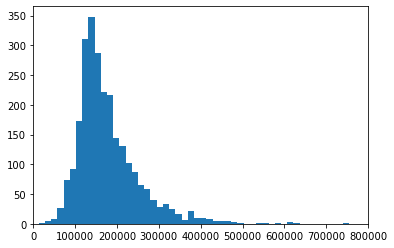

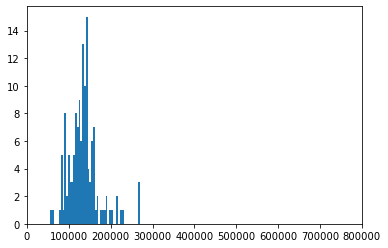

The multi-fam actually don't look bad on this chart, could be the same distribution. will do ppsq as well


In [26]:
plt.hist(raw_data['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()


multifam_rows = raw_data[np.logical_or(raw_data['MSSubClass']==90, raw_data['MSSubClass']==190)]
plt.hist(multifam_rows['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()
print('The multi-fam actually don\'t look bad on this chart, could be the same distribution. will do ppsq as well')

<ipython-input-27-da5809d113ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifam_rows['ppsf'] = multifam_rows['SalePrice'] / multifam_rows['GrLivArea']


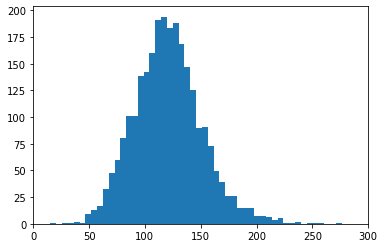

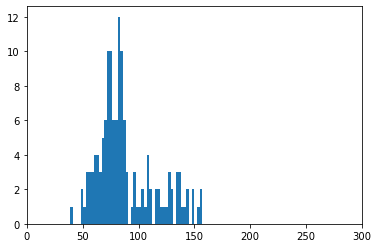

In [27]:
raw_data['ppsf'] = raw_data['SalePrice'] / raw_data['GrLivArea']
multifam_rows['ppsf'] = multifam_rows['SalePrice'] / multifam_rows['GrLivArea']

plt.hist(raw_data['ppsf'], bins=50)
plt.xlim(0,300)
plt.show()


plt.hist(multifam_rows['ppsf'], bins=50)
plt.xlim(0,300)
plt.show()

In [28]:
import scipy.stats as stats
singlefam_rows = raw_data[~np.logical_or(raw_data['MSSubClass']==90, raw_data['MSSubClass']==190)]

print('T-test on SalePrice: ', stats.ttest_ind(multifam_rows['SalePrice'], singlefam_rows['SalePrice'], equal_var=True))

print('T-test on ppsf: ', stats.ttest_ind(multifam_rows['ppsf'], singlefam_rows['ppsf'], equal_var=True))

T-test on SalePrice:  Ttest_indResult(statistic=-6.9915709195913545, pvalue=3.4491418647583213e-12)
T-test on ppsf:  Ttest_indResult(statistic=-13.296146708441576, pvalue=4.573613936252677e-39)


Both have extremely small p-values, so we can reject the null hypothesis that the multi-fam house sale prices are from the same distribution as single-fam sale prices. The multi-fam rows should be dropped.

Other areas to explore for dropping columns: 0 kitchens above ground, and 3 kitchens above ground.

Functional column, homes with Major deductions (aka homes are not in good working order).

Maybe the absolute oldest of homes, really old homes can be difficult to price and are probsbly the ones with very non-standard categories.

Stone or wood foundation. But this might be part of the 'really old homes'

For Sale Type - Maybe drop New home sales, I think new homes are priced a bit differently than existing homes. But maybe that's captured in yearbuilt, so maybe not a big deal.

Sale Type - Maybe drop COD, stands for court officer deed/estate. They might be non-standard sales, but I don't know a lot about them.
https://danilsonlaw.com/five-kinds-property-deeds-need-know/

Sale Condition: Maybe drop Abrnormal - says its from trade, foreclosure, short sale. This means the SalePrice probably isnt representative of a normal sale.  Maybe drop Family sale as well, I bet those transactions aren't fully at market price either.

Maybe have a max sqft cutoff, since our model doesnt have much info for really large (or even really small) houses. We want to stick to using the model in the ranges where we have data, so maybe explicitly setting the range is a good idea.

MSZoning, maybe get rid of the agricultural, commerical, and industrial properties. Stick to residential properties.

There are a few lots with massive LotArea, maybe get rid of those. Having a hugely outsized part of the property value be land rather than house could be an issue when trying to compare it to more typical-sized properties where the house is a bigger percentage of the total value.

Utilities - we should definitely get rid of NoSewr properties. With only 2 properties we don't have enough info to talk about the hit to value from not being connected to public sewers. 

Address - 30 properties have no addresses (according to Gabby. 21 according to Jude's col viz), look into what these are and see if they should be dropped. 

BldgType - Look into getting rid of duplex / 2fmcon. Could be big overlap with MSSubClass drops too. 

OverallQual - Maybe get rid of the absolute worst-quality homes. Probably wouldnt want to be looking at those to buy as Zillow, and with so few examples it is hard to price those poor-quality homes.



## Zero Kitchens above ground (drop investigation)

In [29]:
raw_data[raw_data['KitchenAbvGr']==0].iloc[:,0:10]
# One (row 551) is in MSSubClass 90.
# The other (row 2245) looks perfectly normal


,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley
551,551,908103310,1012,127500,90,RL,38.0,7840,Pave,NaN
2245,2245,914478020,918,148000,80,RL,NaN,8750,Pave,NaN


In [35]:
raw_data.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

## Functional Column (drop Major/Salvage investigation)

In [176]:
maj_bool = np.logical_or(raw_data['Functional']=='Maj1', raw_data['Functional']=='Maj2')
func_bool = np.logical_or(maj_bool, raw_data['Functional']=='Sal')

raw_data[func_bool].iloc[:,10:30]

# Row 205: Alley Grvl, OverallCond 1, 
# Row 267: OverQual 2, OverallCond 1,
# Row 328:
# Row 348:
# Row 568: OverallCond 1,
# Row 904: OverallQual 2, 
# Row 930:
# Row 1065:
# Row 1115:
# Row 1233: OverallQual 1, OverallCond 1,
# Row 1493:
# Row 1506:
# Row 1549:
# Row 1582:
# Row 1599:
# Row 1794:
# Row 1850:
# Row 1946:
# Row 1974:
# Row 1984:
# Row 2134:
# Row 2144:
# Row 2159:
# Row 2273: OverallQual 2, 
# Row 2282: MSSubClass 190, 
# Row 2513:

# I'm thinking don't drop, its not clear that these are all bad records for estimating home price. 

,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea
205,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0
267,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,2,1,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0
328,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1957,1982,Gable,CompShg,MetalSd,MetalSd,None,0.0
348,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,6,5,2004,2006,Gable,CompShg,VinylSd,VinylSd,Stone,50.0
568,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0
904,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,2,4,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0
930,Reg,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,8,1932,1994,Hip,CompShg,BrkFace,BrkFace,None,0.0
1065,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Stucco,Stucco,None,0.0
1115,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0
1233,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0


## Oldest Homes (Drop investigation)

Whisker info:  [array([1953., 1890.]), array([1998., 2010.])]


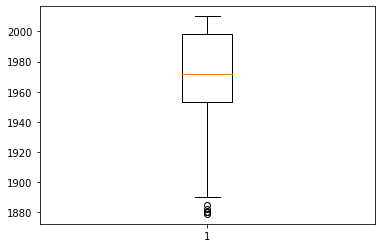

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley
23,23,902326030,2640,265979,70,RM,65.0,11700,Pave,Pave
469,469,902330010,2358,122000,70,RM,50.0,5250,Pave,Pave
514,514,902125020,1750,124000,70,RM,50.0,9000,Pave,Grvl
607,607,906226060,2016,131000,70,RL,120.0,26400,Pave,NaN
880,880,902402250,2290,122500,190,RM,60.0,11340,Pave,NaN
1162,1162,902207220,3493,295000,75,RM,87.0,18386,Pave,NaN
1672,1672,902330040,1742,168000,70,RM,121.0,17671,Pave,Grvl
2026,2026,902304040,2210,117500,70,RM,90.0,9900,Pave,NaN
2085,2085,905101100,1020,94000,50,RL,54.0,6342,Pave,NaN
2462,2462,902125120,1047,100000,30,RM,60.0,10800,Pave,Grvl


In [62]:
bp = plt.boxplot(data['YearBuilt'])
print('Whisker info: ', [item.get_ydata() for item in bp['whiskers']])
plt.show()
# lower whisker: 1890.
# Lower quartile: 1953.

raw_data[raw_data['YearBuilt']<1890].iloc[:,0:10]
# Most in the Old Town neighborhood. Most actually have updated electrical.All but one is Typ functional.
# Row 23: Alley Pave, 
# Row 469: Alley Pave,
# Row 514: Alley Grvl,
# Row 607: 
# Row 880: MSSubClass 190, 
# Row 1162: 
# Row 1672: Alley Grvl,
# Row 2026: 
# Row 2085: 
# Row 2462: Alley Grvl,
# Row 2501: Alley Grvl,
# Honestly, doesnt look like that great of a set to cut out. They appear fairly normal except for age. 

## Stone or Wood Foundation (Drop Investigation)

In [78]:
raw_data[np.logical_or(raw_data['Foundation']=='Stone', raw_data['Foundation']=='Wood')].iloc[:,90:100]
# All wood foundations have basement dqft (surprising), Most have standard electrical, Most are in 'Typ' functional. 
# Row 23: Alley Pave, YearBuilt 1880, 
# Row 323: Alley Grvl, 
# Row 721: 
# Row 1050: MSSubClass 190, Alley Grvl, 
# Row 1151: 
# Row 1214: Yearbuilt 1892
# Row 1336: MSZoning C (all), 
# Row 1351: Foundation Wood, 
# Row 1703: Foundation Wood, 
# Row 1710: Alley Grvl, YearBuilt 1890
# Row 1718: MSSubClass 190, Alley Grvl, 
# Row 2013: YearBuilt 1895, Foundation Wood, 
# Row 2256: Foundation Wood, 
# Row 2379: Foundation Wood, 
# Not really a lot here, thought there would have been more. Don't recommend we drop it. 

,SchD_S,TxD_S,LndAc_S,ImpAc_S,OthAc_S,HSTtl_D,HSTtl_S,GLA,ppsf
23,1.0,1.0,57300.0,0.0,172000.0,NaN,NaN,2640.0,100.749621
323,1.0,1.0,37400.0,0.0,112300.0,4850.0,4850.0,1428.0,97.969188
721,1.0,1.0,33600.0,0.0,100900.0,4850.0,4850.0,900.0,127.472527
1050,1.0,1.0,43200.0,0.0,129400.0,4850.0,4850.0,1928.0,71.058091
1151,1.0,1.0,77600.0,0.0,232700.0,NaN,NaN,2340.0,113.888889
1214,1.0,1.0,37900.0,0.0,113500.0,NaN,NaN,2372.0,45.320405
1336,1.0,1.0,25600.0,0.0,76600.0,NaN,NaN,864.0,75.231481
1351,1.0,1.0,51600.0,0.0,154800.0,4850.0,4850.0,1362.0,104.992658
1703,5.0,45.0,73700.0,0.0,221100.0,NaN,NaN,2064.0,93.607306
1710,1.0,1.0,57100.0,0.0,171500.0,4850.0,4850.0,2268.0,105.820106


## For SaleType: Investigate if new homes are different.

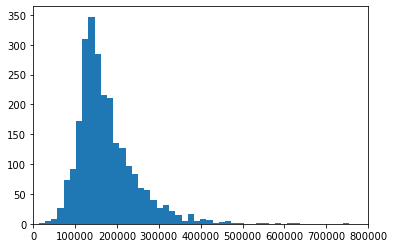

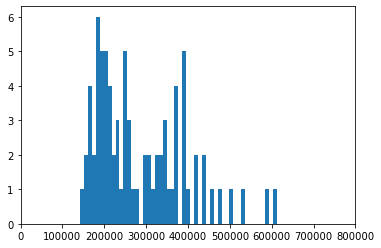

T-test on SalePrice for new sales and existing sales Ttest_indResult(statistic=13.653852982174964, pvalue=4.94346995013908e-41)
T-test on ppsf for new sales and existing sales Ttest_indResult(statistic=9.257669707109692, pvalue=2.4843998606990567e-14)


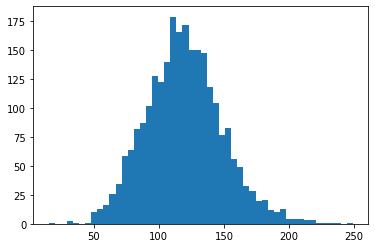

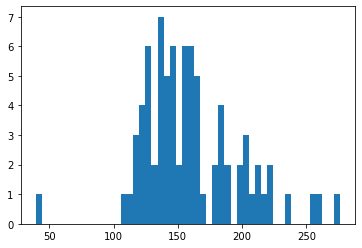

In [94]:
new_sales = raw_data[raw_data['SaleType']=='New']
existing_sales = raw_data[~(raw_data['SaleType']=='New')]

plt.hist(existing_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

plt.hist(new_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

print('T-test on SalePrice for new sales and existing sales', 
      stats.ttest_ind(new_sales['SalePrice'], existing_sales['SalePrice']))

print('T-test on ppsf for new sales and existing sales', 
      stats.ttest_ind((new_sales['SalePrice']/new_sales['GrLivArea']), 
                      (existing_sales['SalePrice']/existing_sales['GrLivArea']), equal_var=False))

plt.hist(existing_sales['SalePrice']/existing_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

plt.hist(new_sales['SalePrice']/new_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

New home sales are clearly different in characteristics than existing home sales, they are not part of the same distribution (super small p-value, even when equal variance is not assumed). I think we'll want to drop them though.Even when doing it on log(SalePrice) to make the data more normal, it is still 10e-31 magnitude p. 

## SaleType - COD (court officer deed) - Drop investigation

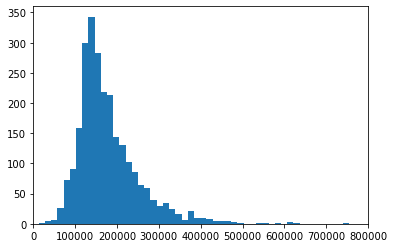

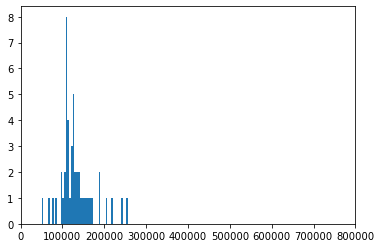

T-test on SalePrice for COD and nonCOD sales Ttest_indResult(statistic=-4.332207157883885, pvalue=1.5327093919118916e-05)
T-test on ppsf for COD sales and nonCOD sales Ttest_indResult(statistic=-6.299927259833415, pvalue=6.322102590948715e-08)


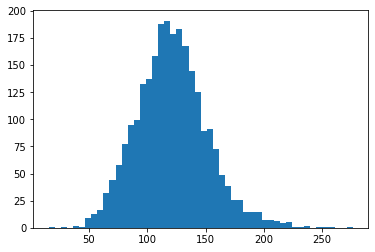

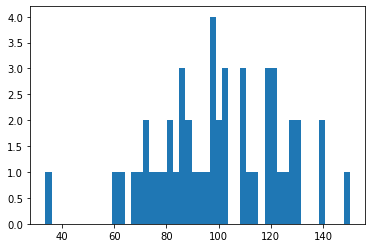

In [125]:
COD_sales = raw_data[raw_data['SaleType']=='COD']
nonCOD_sales = raw_data[~(raw_data['SaleType']=='COD')]

plt.hist(nonCOD_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

plt.hist(COD_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

print('T-test on SalePrice for COD and nonCOD sales', 
      stats.ttest_ind(COD_sales['SalePrice'], nonCOD_sales['SalePrice']))

print('T-test on ppsf for COD sales and nonCOD sales', 
      stats.ttest_ind((COD_sales['SalePrice']/COD_sales['GrLivArea']), 
                      (nonCOD_sales['SalePrice']/nonCOD_sales['GrLivArea']), equal_var=False))

plt.hist(nonCOD_sales['SalePrice']/nonCOD_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

plt.hist(COD_sales['SalePrice']/COD_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

According to t-test, COD sales are different enough from the rest of the records that it should be considered a different population. I have now received this for all the tests I have done. I wonder if this is a real result, or if is due to the non-normality of the data and the test not working well. I will investigate this next with random sampling.

## Testing random samples of SalePrice's for t-test validity.

In [115]:
output_list=[]

for i in range(20):
    random_subset = np.random.choice(raw_data['SalePrice'], 50, replace=False)
    hold = ('test #'+str(i)+' p-value:', stats.ttest_ind(random_subset, raw_data['SalePrice'])[1])
    output_list.append(hold)
output_list

#Proof that a random sample drawn from home sales will in fact have a large p-value 
# and the null hypothesis will be accepted. This adds to the meaning of the small p-values
# I have been seeing in my tests.


[('test #0 p-value:', 0.12112910712846814),
 ('test #1 p-value:', 0.47914022591153893),
 ('test #2 p-value:', 0.16958951676826256),
 ('test #3 p-value:', 0.17948261413411276),
 ('test #4 p-value:', 0.8071120504476931),
 ('test #5 p-value:', 0.420406480139769),
 ('test #6 p-value:', 0.686962458875816),
 ('test #7 p-value:', 0.03390135288431964),
 ('test #8 p-value:', 0.16366256975441318),
 ('test #9 p-value:', 0.6827180914719366),
 ('test #10 p-value:', 0.5006863778970194),
 ('test #11 p-value:', 0.5991369066550991),
 ('test #12 p-value:', 0.45009214074263326),
 ('test #13 p-value:', 0.2567954515892089),
 ('test #14 p-value:', 0.7344417939101726),
 ('test #15 p-value:', 0.05184209053618742),
 ('test #16 p-value:', 0.9866398070555086),
 ('test #17 p-value:', 0.6797178125708381),
 ('test #18 p-value:', 0.7593555114550538),
 ('test #19 p-value:', 0.24425575913035605)]

## SaleCondition - Abnormal - drop inspection

Here I think the right condition to test is price per square foot.

In [124]:
raw_data[raw_data['SaleCondition']=='Abnorml'].iloc[:31,30:40]
# Nothing about these rows really jumps out at me. But, i expect the prices to not be representative,
# I didn't have any thought on the features being off.

,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
52,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0
63,Gd,TA,PConc,Ex,TA,Gd,GLQ,1420.0,Unf,0.0
111,Gd,TA,PConc,Gd,TA,No,GLQ,649.0,Unf,0.0
124,Gd,TA,PConc,Gd,TA,Gd,GLQ,2085.0,Unf,0.0
143,Gd,TA,PConc,Gd,TA,Mn,GLQ,789.0,Unf,0.0
166,Fa,Fa,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0
167,TA,TA,BrkTil,TA,Gd,No,BLQ,452.0,LwQ,12.0
174,TA,TA,CBlock,Gd,TA,Mn,ALQ,847.0,Unf,0.0
205,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0
232,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0


Abnormal count:  61


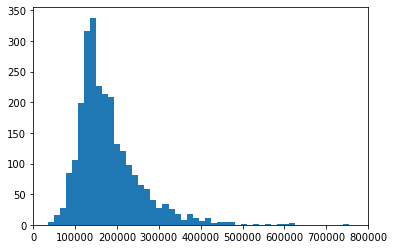

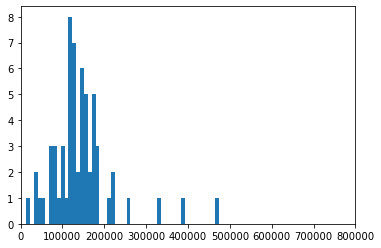

T-test on SalePrice for abnormal sales and normal sales Ttest_indResult(statistic=-3.6239671424055455, pvalue=0.0002957280876052432)
T-test on ppsf for new sales and existing sales Ttest_indResult(statistic=-3.8962760276847415, pvalue=0.00024140455972129424)


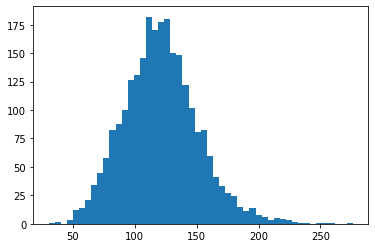

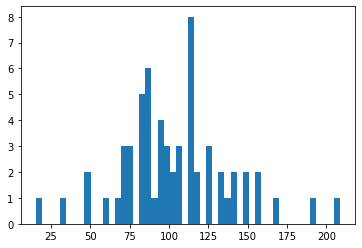

In [128]:
# T-tests to see if these house prices are un-representative.
print('Abnormal count: ', np.sum(raw_data['SaleCondition']=='Abnorml'))
      
abnormal_sales = raw_data[raw_data['SaleCondition']=='Abnorml']
normal_sales = raw_data[~(raw_data['SaleCondition']=='Abnorml')]

plt.hist(normal_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

plt.hist(abnormal_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

print('T-test on SalePrice for abnormal sales and normal sales', 
      stats.ttest_ind(abnormal_sales['SalePrice'], normal_sales['SalePrice']))

print('T-test on ppsf for new sales and existing sales', 
      stats.ttest_ind((abnormal_sales['SalePrice']/abnormal_sales['GrLivArea']), 
                      (normal_sales['SalePrice']/normal_sales['GrLivArea']), equal_var=False))

plt.hist(normal_sales['SalePrice']/normal_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

plt.hist(abnormal_sales['SalePrice']/abnormal_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

Clearly the t-tests how that these are different from typical sales, but they are less different than som of the other categories I have tried before. p-value is still very small, but not like in some of the other tests.

## SaleCondition Family (drop inspection)

Family sale count:  17


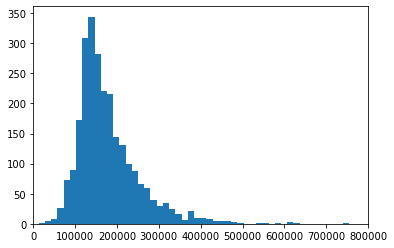

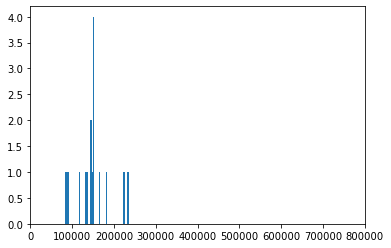

T-test on SalePrice for family sales and normal sales Ttest_indResult(statistic=-1.7153541740447606, pvalue=0.08640047455744099)
T-test on ppsf for family sales and normal sales Ttest_indResult(statistic=-3.001627853814809, pvalue=0.0083599804313263)


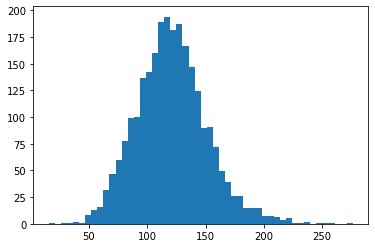

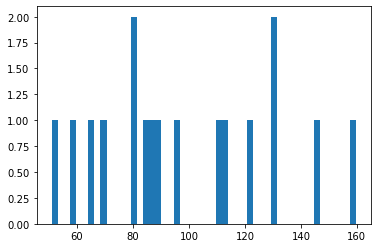

In [129]:
# T-tests to see if these house prices are un-representative.
print('Family sale count: ', np.sum(raw_data['SaleCondition']=='Family'))
      
family_sales = raw_data[raw_data['SaleCondition']=='Family']
nonfam_sales = raw_data[~(raw_data['SaleCondition']=='Family')]

plt.hist(nonfam_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

plt.hist(family_sales['SalePrice'], bins=50)
plt.xlim(0,800000)
plt.show()

print('T-test on SalePrice for family sales and normal sales', 
      stats.ttest_ind(family_sales['SalePrice'], nonfam_sales['SalePrice']))

print('T-test on ppsf for family sales and normal sales', 
      stats.ttest_ind((family_sales['SalePrice']/family_sales['GrLivArea']), 
                      (nonfam_sales['SalePrice']/nonfam_sales['GrLivArea']), equal_var=False))

plt.hist(nonfam_sales['SalePrice']/nonfam_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

plt.hist(family_sales['SalePrice']/family_sales['GrLivArea'], bins=50)
#plt.xlim(0,800000)
plt.show()

Interesting, family sales have a p-value of 0.08 when compared to non-family sales. Keep the rows, failed to reject the null hypothesis.

## Max sqft cutoff? (drop investigation)

Whisker info:  [array([1112.,  334.]), array([1733., 2654.])]


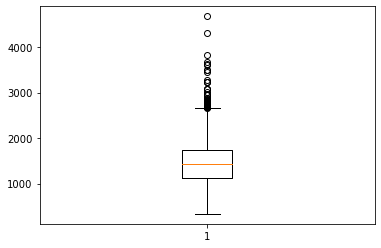

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ClassSc_S,SchD_S,TxD_S,LndAc_S,ImpAc_S,OthAc_S,HSTtl_D,HSTtl_S,GLA,ppsf
300,300,533206020,3005,280750,160,FV,32.0,2880,Pave,Pave,...,2-STORY TWNHM - 1946 & NEWER,1.0,1.0,87800.0,0.0,263300.0,NaN,NaN,3005.0,93.427621
309,309,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,...,2-STORY 1946 & NEWER,1.0,1.0,218300.0,0.0,654900.0,4850.0,4850.0,4720.0,39.510265
388,388,905427030,3672,415000,75,RL,60.0,19800,Pave,NaN,...,2-1/2 STORY ALL AGES,1.0,1.0,93500.0,0.0,280300.0,4850.0,4850.0,3672.0,113.017429
524,524,909282030,3447,381000,50,RL,NaN,14100,Pave,NaN,...,1-1/2 STORY FINISHED ALL AGES,1.0,1.0,110800.0,0.0,332500.0,NaN,NaN,3447.0,110.530896
577,577,906402200,3222,320000,60,RL,90.0,12376,Pave,NaN,...,2-STORY 1946 & NEWER,1.0,1.0,97700.0,0.0,293100.0,4850.0,4850.0,3222.0,99.317194
802,802,527216070,3279,538000,60,RL,47.0,53504,Pave,NaN,...,2-STORY 1946 & NEWER,5.0,45.0,143500.0,0.0,430400.0,4850.0,4850.0,3256.0,164.074413
1007,1007,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,...,2-STORY 1946 & NEWER,1.0,1.0,184000.0,0.0,552100.0,4850.0,4850.0,4316.0,174.930491
1162,1162,902207220,3493,295000,75,RM,87.0,18386,Pave,NaN,...,2-1/2 STORY ALL AGES,1.0,1.0,90900.0,0.0,272500.0,4850.0,4850.0,3493.0,84.454624
1203,1203,909179020,3082,197000,75,RL,102.0,15863,Pave,NaN,...,2-1/2 STORY ALL AGES,1.0,1.0,59200.0,0.0,177600.0,4850.0,4850.0,3082.0,63.919533
1316,1316,528366050,3228,430000,20,RL,NaN,12692,Pave,NaN,...,1-STORY 1946 & NEWER ALL STYLES,1.0,1.0,122500.0,0.0,367400.0,4850.0,4850.0,3228.0,133.209418


In [188]:
bp = plt.boxplot(raw_data['GrLivArea'])
print('Whisker info: ', [item.get_ydata() for item in bp['whiskers']])
plt.show()
raw_data[raw_data['GrLivArea']>3000]
# Even though 2650 is the cutoff level indicated by the box plot for outliers, 
# I think we could get away with limiting the model to predicting home 
# values below 3,000 sqft in size.

#2654 cutoff would have us dropping 57 rows.

## MSZoning (drop investigation)

In [148]:
print(raw_data['MSZoning'].value_counts())
mid_point = np.logical_or(raw_data['MSZoning']=='C (all)', raw_data['MSZoning']=='I (all)')
mask = np.logical_or(mid_point, raw_data['MSZoning']=='A (agr)')
print('\nNumber of rows covered: ', np.sum(mask))

raw_data[mask].iloc[:,45:60]
# includes a NoSewr column. 
# IDOTRR (Iowa DOT & RR) is the most common Neighborhood.Very non-standard properties. 
# High proportion of sub-standard electrical too.
# I think these should definitely be dropped. Non-standard properties.  

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Number of rows covered:  20


,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu
2,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN
127,FuseA,671,378,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN
166,SBrkr,1060,336,0,0.0,0.0,2,0,4,2,TA,8,Min2,0,NaN
254,SBrkr,1260,1031,0,0.0,1.0,2,0,4,2,TA,9,Typ,1,Gd
558,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN
568,SBrkr,1150,686,0,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN
644,FuseA,480,0,0,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN
670,FuseA,698,430,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN
740,SBrkr,649,668,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN
834,SBrkr,894,0,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN


## LotArea - Cutoff Size (drop analysis)

Whisker info:  [array([7406.75, 1300.  ]), array([11494., 17600.])]


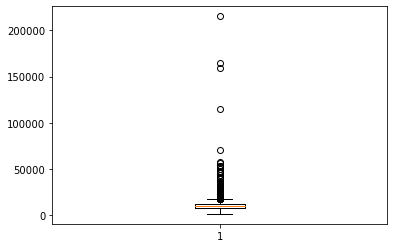

,SalePrice,GrLivArea,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,MSSubClass_>1-story,MSSubClass_multi_fam,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,UnpavedDrive,WoodDeckBinary,HasPorch,FenceBinary,Fireplaces,NoCentralAir,SchD_S
5,228950,1786,1619,167,7,3,2,0,0,1,...,0,0,1,0,1,0,0,2,0,0
252,302000,1824,1824,0,5,2,2,0,0,0,...,0,0,0,0,1,1,0,2,0,0
292,385000,1842,1842,0,5,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
440,256000,1663,1663,0,6,2,1,0,0,0,...,0,0,0,0,1,1,0,2,0,0
751,160000,1687,1687,0,7,3,1,0,0,0,...,0,0,1,1,0,1,0,2,0,0
1030,591587,2338,2338,0,8,4,2,1,0,0,...,0,0,0,0,0,1,0,2,0,1
1151,280000,1533,1533,0,5,2,2,0,0,0,...,0,0,0,0,1,1,0,2,0,0
1717,538000,3279,1690,1589,12,4,3,1,1,0,...,0,0,0,0,1,1,0,1,0,1


In [154]:
bp = plt.boxplot(raw_data['LotArea'])
print('Whisker info: ', [item.get_ydata() for item in bp['whiskers']])
plt.show()
# Note to self, 43,560 sq ft per acre.
#Upper whisker is at just 17,600 sqft.
data[data['LotArea']>50000]
# 71 properties over 17,600sqft (0.4 Acres)
# Just 12 rows at the 43,560 (1acre) cutoff. 
# Just 8 at the 50,000 sqft cutoff.

# I think we go 1acre lot cutoff. 

## Utilities - NoSewr drop

In [155]:
raw_data[raw_data['Utilities']=='NoSewr']

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ClassSc_S,SchD_S,TxD_S,LndAc_S,ImpAc_S,OthAc_S,HSTtl_D,HSTtl_S,GLA,ppsf
2086,2086,527226020,1474,115000,20,RL,NaN,31220,Pave,NaN,...,1-STORY 1946 & NEWER ALL STYLES,5.0,45.0,50800.0,0.0,152400.0,NaN,NaN,1475.0,78.018996
2323,2323,912251110,810,57625,30,I (all),109.0,21780,Grvl,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.141975


In [156]:
# Still have address and OverallQual to go.

## Prop_Addr - Look into NaN's as drop candidates

In [162]:
raw_data[raw_data['Prop_Addr'].isnull()].iloc[:,45:60]
# 4 are industrial, agricultural, or commercial.

# I wouldn't drop all these columns, since they all have a MapRefNo from the original dataset, just 
# not an address when combined with the more recent real state dataset (I think). 

,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu
79,FuseA,1012,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN
109,SBrkr,1502,0,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA
404,SBrkr,1382,0,0,1.0,0.0,1,0,3,1,TA,6,Typ,1,TA
495,FuseA,612,0,0,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN
558,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN
680,SBrkr,848,672,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN
683,SBrkr,1295,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN
895,SBrkr,1142,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd
1088,SBrkr,1120,468,0,0.0,0.0,2,0,4,1,TA,7,Min2,1,Gd
1204,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,NaN


## OverallQual - Drop bad ones?

In [163]:
raw_data['OverallQual'].value_counts()

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: OverallQual, dtype: int64

In [173]:
# Looking at valuecounts, definitely drop 1 and 2, maybe 3's as well. 
raw_data[raw_data['OverallQual']==3].iloc[:,30:45]
#1 and 2 definitly drop, leaning towards 3 as well.

,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir
17,TA,TA,BrkTil,TA,TA,No,BLQ,41.0,Unf,0.0,823.0,864.0,GasA,TA,N
37,TA,TA,BrkTil,Fa,TA,No,LwQ,416.0,Unf,0.0,76.0,492.0,GasA,TA,Y
215,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N
227,TA,TA,CBlock,TA,TA,No,LwQ,144.0,Unf,0.0,226.0,370.0,GasA,TA,N
399,TA,TA,BrkTil,TA,TA,No,Rec,544.0,Unf,0.0,0.0,544.0,GasA,Ex,Y
634,Gd,Gd,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Gd,N
834,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,TA,Y
853,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,630.0,630.0,GasA,TA,Y
975,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,713.0,713.0,GasA,Ex,Y
1070,TA,TA,BrkTil,TA,Fa,No,Unf,0.0,Unf,0.0,1007.0,1007.0,GasA,Fa,N


### Now, the question becomes what exactly to drop. 

I think we drop MSSubClasses 90 and 190.

Drop SaleType = New, and SaleType = COD since new homes should be priced differently and COD sales are shown to have diff characteristics.

Drop Condition=Abnormal, those dont fit as seen by t-test. 

Max GrLivArea = 3000sqft.

MSZoning drop C, I, A

LotArea, cutoff at 43,560

Utilities, drop NoSewr

OverallQual - Drop 1 and 2

In [224]:
# Drop Column Formulation

# Multi-fam drops
MS90 = raw_data['MSSubClass']==90
MS190 = raw_data['MSSubClass']==190
MSSubClass_drops = np.logical_or(MS90, MS190)
print('MS Subclass Drops: ', np.sum(MSSubClass_drops))

# SaleType Drops
new_sales = raw_data['SaleType']=='New'
COD_sales = raw_data['SaleType']=='COD'
SaleType_drops = np.logical_or(new_sales, COD_sales)
tot1_drops = np.logical_or(MSSubClass_drops, SaleType_drops)
print('SaleType Subclass Drops: ', np.sum(tot1_drops)-np.sum(MSSubClass_drops))

# Abnormal Condition drops
abnormal_drops = raw_data['SaleCondition']=='Abnorml'
tot2_drops = np.logical_or(abnormal_drops, tot1_drops)
print('Abnormal Sale Condition drops: ', np.sum(tot2_drops) - np.sum(tot1_drops))

# Square Footage Cutoff
lg_sqft = raw_data['GrLivArea']>3000
tot3_drops = np.logical_or(tot2_drops, lg_sqft)
print('Large SqFt drops: ', np.sum(tot3_drops) - np.sum(tot2_drops))

# Zoning C, I, A drops
zoning_drops = np.logical_or(np.logical_or(raw_data['MSZoning']=='C (all)', raw_data['MSZoning']=='I (all)'), 
                            raw_data['MSZoning']=='A (agr)')
tot4_drops = np.logical_or(zoning_drops, tot3_drops)
print('MSZoning drops: ', np.sum(tot4_drops) - np.sum(tot3_drops))

#LotArea cutoff 
lots_cutoff = raw_data['LotArea']>43560
tot5_drops = np.logical_or(lots_cutoff, tot4_drops)
print('LotArea cutoff drops: ', np.sum(tot5_drops) - np.sum(tot4_drops))

#Utilities NoSewr drop
no_sewer = raw_data['Utilities']=='NoSewr'
tot6_drops = np.logical_or(no_sewer, tot5_drops)
print('No Sewer drops: ', np.sum(tot6_drops) - np.sum(tot5_drops))

# OverallQual drops
oq_drops = raw_data['OverallQual']<3
final_drops = np.logical_or(oq_drops, tot6_drops)
print('OverallQual drops: ', np.sum(final_drops) - np.sum(tot6_drops))

# Total Drop Number
print('\nTotal number of rows dropped: ', np.sum(final_drops))

MS Subclass Drops:  140
SaleType Subclass Drops:  125
Abnormal Sale Condition drops:  44
Large SqFt drops:  16
MSZoning drops:  13
LotArea cutoff drops:  11
No Sewer drops:  1
OverallQual drops:  11

Total number of rows dropped:  361


## Now that I have the list of rows I want to drop, investigate what the dataset looks like afterwards.

Rows in filtered data:  2219
T-test p-value for the filtered vs unfiltered datasets:  0.7490839816951768


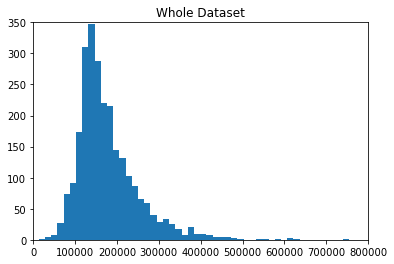

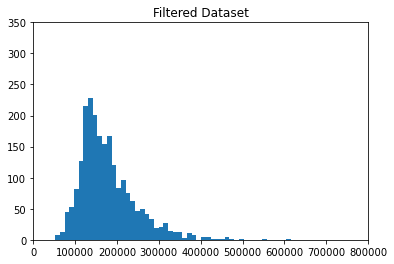

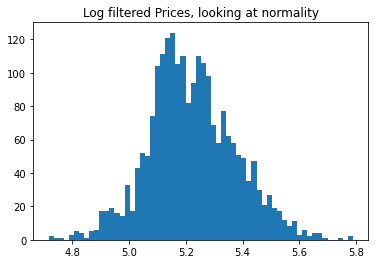

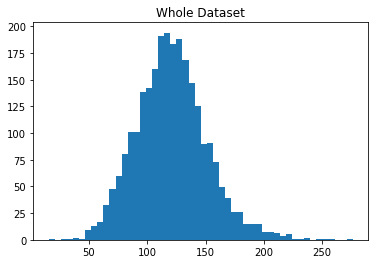

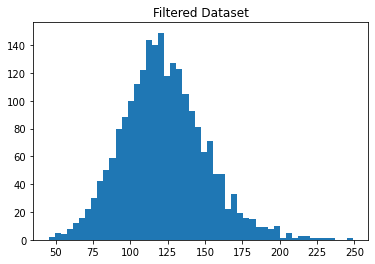

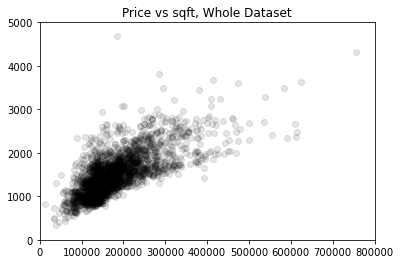

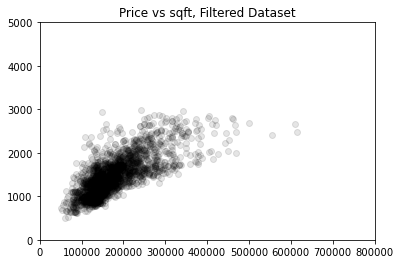

In [248]:
filtered_raw_data = raw_data[~final_drops]
print('Rows in filtered data: ', filtered_raw_data.shape[0])
dist_comparo = stats.ttest_ind(filtered_raw_data['SalePrice'], raw_data['SalePrice'])
print('T-test p-value for the filtered vs unfiltered datasets: ', dist_comparo[1])

# price hist before and after
plt.hist(raw_data['SalePrice'], bins=50)
plt.title('Whole Dataset')
plt.xlim(0,800000)
plt.ylim(0,350)
plt.show()

plt.hist(filtered_raw_data['SalePrice'], bins=50)
plt.title('Filtered Dataset')
plt.xlim(0,800000)
plt.ylim(0,350)
plt.show()

plt.hist(np.log10(filtered_raw_data['SalePrice']), bins=60)
plt.title('Log filtered Prices, looking at normality')
plt.show()


# ppsf before and after
plt.hist(raw_data['ppsf'], bins=50)
plt.title('Whole Dataset')
plt.show()

plt.hist(filtered_raw_data['ppsf'], bins=50)
plt.title('Filtered Dataset')
plt.show()

# scatterplot of price to size before and after
plt.scatter(raw_data['SalePrice'], raw_data['GrLivArea'], c='black', alpha=.1)
plt.title('Price vs sqft, Whole Dataset')
plt.xlim(0,800000)
plt.ylim(0,5000)
plt.show()

plt.scatter(filtered_raw_data['SalePrice'], filtered_raw_data['GrLivArea'], c='black', alpha=.1)
plt.title('Price vs sqft, Filtered Dataset')
plt.xlim(0,800000)
plt.ylim(0,5000)
plt.show()